<a href="https://colab.research.google.com/github/raqueeb/TensorFlow2/blob/master/scikit_learn_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# সাইকিট লার্ন এবং টেন্সর-ফ্লো নিয়ে একসাথে কাজ

সব কাজেই আমি সাইকিট লার্ন ব্যবহার করতে পারি। মেশিন লার্নিং আর ডিপ লার্নিং এর মধ্যে ফারাক নেই বললেই চলে। শুরুতেই বিভিন্ন লাইব্রেরি লোড করে নিলাম। কাজ করবো ডিপ লার্নিং নিয়ে, কিন্তু শুরুতেই প্রি-প্রসেসিং করে নিচ্ছি সাইকিট লার্ন দিয়ে। 

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# প্রি-প্রসেসিং করে নিচ্ছি সাইকিট লার্ন দিয়ে 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## ১. সাইকিট লার্ন দিয়ে ট্রেইন/টেস্ট স্প্লিট 

মনে আছে তো শূন্য থেকে পাইথন মেশিন লার্নিং বইটার কথা?

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/raqueeb/TensorFlow2/master/datasets/geoloc_elev.csv')

# আমরা শুধুমাত্র দুটো ফিচার ব্যবহার করছি এখানে 
X = df[['lat', 'lon']].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.3, random_state=0)

## প্লটিং করে দেখি ডেটার ভেতরের গল্প 

কি মনে হচ্ছে, হবে কী বেসিক মেশিন লার্নিং দিয়ে? ঠিক ধরেছেন, এটা একটা নন-লিনিয়ার ডেটা। 

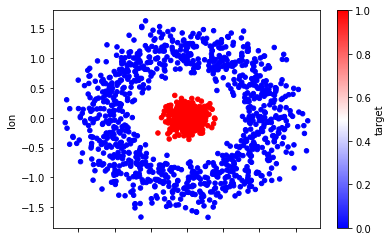

In [24]:
df.plot(kind='scatter',
        x='lat',
        y='lon',
        c='target',
        cmap='bwr');

## ২. শুরুতে ১ নিউরনের (নোড) নিউরাল নেটওয়ার্ক 

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [26]:
model = Sequential([
    Dense(1, input_dim=2, activation='sigmoid')
])

model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

h = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Train on 945 samples, validate on 105 samples
Epoch 1/10
945/945 [==============================] - 0s 132us/sample - loss: 0.6640 - acc: 0.5608 - val_loss: 0.6553 - val_acc: 0.6381
Epoch 2/10
945/945 [==============================] - 0s 41us/sample - loss: 0.6448 - acc: 0.6582 - val_loss: 0.6549 - val_acc: 0.6381
Epoch 3/10
945/945 [==============================] - 0s 44us/sample - loss: 0.6443 - acc: 0.6582 - val_loss: 0.6567 - val_acc: 0.6381
Epoch 4/10
945/945 [==============================] - 0s 44us/sample - loss: 0.6436 - acc: 0.6582 - val_loss: 0.6539 - val_acc: 0.6381
Epoch 5/10
945/945 [==============================] - 0s 45us/sample - loss: 0.6435 - acc: 0.6582 - val_loss: 0.6550 - val_acc: 0.6381
Epoch 6/10
945/945 [==============================] - 0s 39us/sample - loss: 0.6442 - acc: 0.6582 - val_loss: 0.6544 - val_acc: 0.6381
Epoch 7/10
945/945 [==============================] - 0s 37us/sample - loss: 0.6442 - acc: 0.6582 - val_loss: 0.6538 - val_acc: 0.6381
Epoch 8/

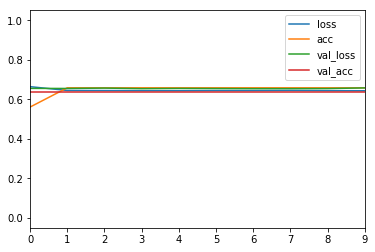

In [27]:
pd.DataFrame(h.history).plot(ylim=(-0.05, 1.05))

## ৩. একটু ডিপ নিউরাল নেটওয়ার্ক 

In [28]:
model = Sequential([
    Dense(4, input_dim=2, activation='tanh'),
    Dense(4, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

h = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 945 samples, validate on 105 samples
Epoch 1/20
945/945 [==============================] - 0s 137us/sample - loss: 0.6381 - acc: 0.6180 - val_loss: 0.6042 - val_acc: 0.6381
Epoch 2/20
945/945 [==============================] - 0s 38us/sample - loss: 0.4979 - acc: 0.8159 - val_loss: 0.3797 - val_acc: 0.9524
Epoch 3/20
945/945 [==============================] - 0s 39us/sample - loss: 0.2458 - acc: 0.9979 - val_loss: 0.1585 - val_acc: 1.0000
Epoch 4/20
945/945 [==============================] - 0s 41us/sample - loss: 0.1184 - acc: 0.9989 - val_loss: 0.0942 - val_acc: 1.0000
Epoch 5/20
945/945 [==============================] - 0s 41us/sample - loss: 0.0731 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 1.0000
Epoch 6/20
945/945 [==============================] - 0s 41us/sample - loss: 0.0513 - acc: 1.0000 - val_loss: 0.0454 - val_acc: 1.0000
Epoch 7/20
945/945 [==============================] - 0s 39us/sample - loss: 0.0379 - acc: 1.0000 - val_loss: 0.0339 - val_acc: 1.0000
Epoch 8/

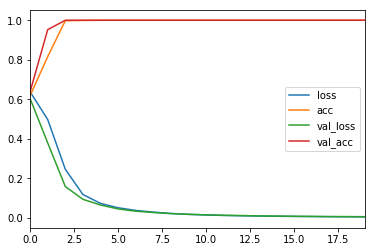

In [29]:
pd.DataFrame(h.history).plot(ylim=(-0.05, 1.05))

## ৪. বেঞ্চমার্ক, ট্রেইন এবং টেস্ট সেটের ওপর অ্যাক্যুরেসি স্কোর দেখলে কেমন হয়?

In [30]:
bm_score = pd.Series(y).value_counts()[0] / len(y)
train_score = model.evaluate(X_train, y_train, verbose=0)[1]
test_score = model.evaluate(X_test, y_test,  verbose=0)[1]

print("""Accuracy scores:
   Benchmark:\t{:0.3}
   Train:\t{:0.3}
   Test:\t{:0.3}""".format(bm_score, train_score, test_score))

Accuracy scores:
   Benchmark:	0.667
   Train:	1.0
   Test:	1.0


## ৫. সাইকিট লার্ন দিয়ে কনফিউশন ম্যাট্রিক্স এবং ক্লাসিফিকেশন রিপোর্ট দেখি 

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict_classes(X_test)

In [32]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm,
             index=["Miss", "Hit"],
             columns=['pred_Miss', 'pred_Hit'])

,pred_Miss,pred_Hit
Miss,311,0
Hit,0,139


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       139

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



## ৬. ডিসিশন বাউন্ডারি দেখলে কেমন হয়?

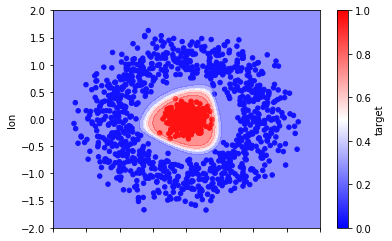

In [34]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)